<a href="https://colab.research.google.com/github/AshwinDeshpande96/LANL-Earthquake-Prediction/blob/master/LANL_Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raw Data Fetching

In [0]:
#Get 'kaggle.json' file from your kaggle profile. Click on 'Edit Profile' --> 'Create New API Token'
#Upload 'kaggle.json' file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{u'kaggle.json': '{"username":"ashwinkd","key":"cf4cc5f8bbcdfbf14e3dc8e256413eb4"}'}

In [0]:
#Make /root/.kaggle/ directory. So that kaggle command can download the data
!mkdir /root/.kaggle/
#Move downloaded 'kaggle.json' to previously created directory
!mv /content/kaggle.json /root/.kaggle/
#change permissions of 'kaggle.json' so that it is only accessible by you
!chmod 600 /root/.kaggle/kaggle.json
!ls /content/

sample_data


In [0]:
#download the Data given by Kaggle Competition
!kaggle competitions download -c LANL-Earthquake-Prediction
#this downloads 3 files: 
#1) sample_submisison.csv  
#2) test.zip - (this contains 2624 csv files with 150000 rows of acoustic_data)   
#3) train.csv.zip - Contains one csv file with approx 150000*4195 rows of ['acoustic_data', 'time_to_failure']
!ls

  0% 0.00/33.3k [00:00<?, ?B/s]
100% 33.3k/33.3k [00:00<00:00, 29.6MB/s]
 96% 233M/242M [00:03<00:00, 45.7MB/s]
100% 242M/242M [00:04<00:00, 63.0MB/s]
100% 2.02G/2.03G [00:45<00:00, 58.5MB/s]
100% 2.03G/2.03G [00:45<00:00, 48.3MB/s]
sample_data  sample_submission.csv  test.zip  train.csv.zip


In [0]:
#extract train.csv.zip file to obtain train.csv file
!unzip train.csv.zip
!ls

Archive:  train.csv.zip
  inflating: train.csv               
sample_data  sample_submission.csv  test.zip  train.csv  train.csv.zip


In [0]:
#extract test.zip file to obtain 2624 'seg_******.csv' files
!unzip test.zip
!ls

In [0]:
#raw data sample
raw_sample = pd.read_csv('train.csv', nrows=100)
raw_sample.head()

acoustic_data  time_to_failure
0             12           1.4691
1              6           1.4691
2              8           1.4691
3              5           1.4691
4              8           1.4691

# Feature Extraction

In [1]:
#Link up to Google Drive to store Extracted Feature Data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from sklearn.linear_model import LinearRegression
#this function returns a single feature: 'abs_trend'
def add_trend_feature(arr, abs_values=False):
    """Fit a univariate linear regression and return the coefficient."""
    idx = np.array(range(len(arr)))
    if abs_values:
        arr = np.abs(arr)
    lr = LinearRegression()
    lr.fit(idx.reshape(-1, 1), arr)
    return lr.coef_[0]


In [0]:
#this function creates a row  124 features: ['abs_max', 'abs_mean', 'abs_std', 'abs_trend', 'ave', 'ave_roll_abs_mean_10', 'ave_roll_abs_mean_100', 'ave_roll_abs_mean_1000', 'ave_roll_abs_mean_50', 'ave_roll_mean_10', 
#'ave_roll_mean_100', 'ave_roll_mean_1000', 'ave_roll_mean_50', 'ave_roll_std_10', 'ave_roll_std_100', 'ave_roll_std_1000', 'ave_roll_std_50', 'max', 'max_roll_mean_10', 'max_roll_mean_100', 'max_roll_mean_1000', 
#'max_roll_mean_50', 'max_roll_min_10', 'max_roll_min_100', 'max_roll_min_1000', 'max_roll_min_50', 'max_roll_std_10', 'max_roll_std_100', 'max_roll_std_1000', 'max_roll_std_50', 'min', 'min_roll_max_10', 
#'min_roll_max_100', 'min_roll_max_1000', 'min_roll_max_50', 'min_roll_mean_10', 'min_roll_mean_100', 'min_roll_mean_1000', 'min_roll_mean_50', 'min_roll_std_10', 'min_roll_std_100', 'min_roll_std_1000', 
#'min_roll_std_50', 'q01', 'q01_roll_std_10', 'q01_roll_std_100', 'q01_roll_std_1000', 'q01_roll_std_50', 'q05', 'q05_roll_abs_mean_10', 'q05_roll_abs_mean_100', 'q05_roll_abs_mean_1000', 'q05_roll_abs_mean_50', 
#'q05_roll_max_10', 'q05_roll_max_100', 'q05_roll_max_1000', 'q05_roll_max_50', 'q05_roll_mean_10', 'q05_roll_mean_100', 'q05_roll_mean_1000', 'q05_roll_mean_50', 'q05_roll_min_10', 'q05_roll_min_100', 
#'q05_roll_min_1000', 'q05_roll_min_50', 'q05_roll_std_10', 'q05_roll_std_100', 'q05_roll_std_1000', 'q05_roll_std_50', 'q10', 'q10_roll_std_10', 'q10_roll_std_100', 'q10_roll_std_1000', 'q10_roll_std_50', 'q90', 'q95',
#'q95_roll_abs_mean_10', 'q95_roll_abs_mean_100', 'q95_roll_abs_mean_1000', 'q95_roll_abs_mean_50', 'q95_roll_max_10', 'q95_roll_max_100', 'q95_roll_max_1000', 'q95_roll_max_50', 'q95_roll_mean_10', 'q95_roll_mean_100',
#'q95_roll_mean_1000', 'q95_roll_mean_50', 'q95_roll_min_10', 'q95_roll_min_100', 'q95_roll_min_1000', 'q95_roll_min_50', 'q95_roll_std_10', 'q95_roll_std_100', 'q95_roll_std_1000', 'q95_roll_std_50', 'q99', 
#'q99_roll_std_10', 'q99_roll_std_100', 'q99_roll_std_1000', 'q99_roll_std_50', 'std', 'std_roll_abs_mean_10', 'std_roll_abs_mean_100', 'std_roll_abs_mean_1000', 'std_roll_abs_mean_50', 'std_roll_max_10', 
#'std_roll_max_100', 'std_roll_max_1000', 'std_roll_max_50', 'std_roll_mean_10', 'std_roll_mean_100', 'std_roll_mean_1000', 'std_roll_mean_50', 'std_roll_min_10', 'std_roll_min_100', 'std_roll_min_1000', 
#'std_roll_min_50', 'std_roll_std_10', 'std_roll_std_100', 'std_roll_std_1000', 'std_roll_std_50', 'std_to_mean', 'trend']
import numpy as np
def extract_features_from_segment(x):
    """Returns a dictionary with the features for the given segment of acoustic data."""
    features = {}
    
    features['ave'] = x.values.mean()
    features['std'] = x.values.std()
    features['max'] = x.values.max()
    features['min'] = x.values.min()
    #features['med'] = np.median(x.values)
    #features['last'] = x.values[-1]
    features['q90'] = np.quantile(x.values, 0.90)
    features['q95'] = np.quantile(x.values, 0.95)
    features['q99'] = np.quantile(x.values, 0.99)
    features['q05'] = np.quantile(x.values, 0.05)
    features['q10'] = np.quantile(x.values, 0.10)
    features['q01'] = np.quantile(x.values, 0.01)
    features['std_to_mean'] = features['std'] / features['ave']
    
    features['abs_max'] = np.abs(x.values).max()
    features['abs_mean'] = np.abs(x.values).mean()
    features['abs_std'] = np.abs(x.values).std()
    features['trend'] = add_trend_feature(x.values)
    features['abs_trend'] = add_trend_feature(x.values, abs_values=True)
    
    # New features - rolling features
    for w in [10, 50, 100, 1000]:
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_min = x.rolling(w).min().dropna().values
        x_roll_max = x.rolling(w).max().dropna().values
        
        features['ave_roll_std_' + str(w)] = x_roll_std.mean()
        features['std_roll_std_' + str(w)] = x_roll_std.std()
        features['max_roll_std_' + str(w)] = x_roll_std.max()
        features['min_roll_std_' + str(w)] = x_roll_std.min()
        features['q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        features['q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        features['q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        features['q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        features['q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        
        features['ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        features['std_roll_mean_' + str(w)] = x_roll_mean.std()
        features['max_roll_mean_' + str(w)] = x_roll_mean.max()
        features['min_roll_mean_' + str(w)] = x_roll_mean.min()
        features['q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        features['q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        
        features['ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        features['std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        features['q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        features['q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        
        features['std_roll_min_' + str(w)] = x_roll_min.std()
        features['max_roll_min_' + str(w)] = x_roll_min.max()
        features['q05_roll_min_' + str(w)] = np.quantile(x_roll_min, 0.05)
        features['q95_roll_min_' + str(w)] = np.quantile(x_roll_min, 0.95)

        features['std_roll_max_' + str(w)] = x_roll_max.std()
        features['min_roll_max_' + str(w)] = x_roll_max.min()
        features['q05_roll_max_' + str(w)] = np.quantile(x_roll_max, 0.05)
        features['q95_roll_max_' + str(w)] = np.quantile(x_roll_max, 0.95)
    return features

In [0]:
import pandas as pd
import time as t
import os
#Feature Extraction found at https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
#make_train function returns a 3 things:
#!) X_train - Training Set of shape (4195 * 124) - Each of 4195 rows is contructed by calling 'extract_features_from_segment' function from 150,000 data-chunk of train.csv file
#2) target - target variable is the value of every 150,000th  train.csv's ['time_to_failure'] data
#3) quake - not used in this project
def make_train():
    features_list = []
    target_list = []
    quake_num = []
    quake_count = 0
    row = 1
    time_so_far = 0
    for segment in pd.read_csv('/content/train.csv', chunksize=150000):
        
        start = t.time()
        
        target_list.append(segment['time_to_failure'].values[-1])
        features_list.append(extract_features_from_segment(segment['acoustic_data']))
        quake_num.append(quake_count)
        
        if any(segment['time_to_failure'].diff() > 5):
            quake_count = quake_count + 1
        
        end = t.time()
        
        time_taken = end - start
        time_so_far += time_taken
        
        print "\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b", row, "/4195 \n ETA: ", round(time_so_far/60, 1), "/", int(time_taken*4195/60) 
        
        row = row + 1
    return pd.DataFrame(features_list), pd.Series(target_list), pd.Series(quake_num)
#reads each 2624 'seg_******.csv' file and creates a (2624*124) dataset for testing
def make_test():
    features_list = {}
    
    row = 1
    time_so_far = 0
    test_files = [file for file in os.listdir(os.getcwd()) if file.startswith("seg")]          #returns an array of every seg_******.csv file in current directory
    num_test_file - len(test_files)
    for file in test_files:
        segment = pd.read_csv(file)
        start = t.time()
        
        
        features_list.append(extract_features_from_segment(segment['acoustic_data']))
        
        
        end = t.time()
        
        time_taken = end - start
        time_so_far += time_taken
        
        print "\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b", row, "\b/" +num_test_file+"\nETA: ", round(time_so_far/60, 1), "\b/", int(time_taken*num_test_file/60) 
        
        row = row + 1
    return pd.DataFrame(features_list)


In [0]:
#X_train, target, quake is created
X_train, target, quake = make_train()
print "Train shape:", X_train.shape, "\n", X_train.head(3), "\nTarget shape:", target.shape, "\n", target.head(3), "\nQuake shape:", quake.shape, "\n", quake.head(3), 


In [0]:
#files are saved onto Google Drive in csv format with X_train - (4195*124) rows & colums, target with (4195, 1) rows & columns, quake with (4195, 1) rows & columns
#change filepath according to your drive directory
X_train.to_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/X_train.csv", index=False)
target.to_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/target.csv", index=False)
quake.to_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/quake.csv", index=False)

In [0]:
#test_set is created
testset = make_test()
#files are saved onto Google Drive in csv format with test_set.csv - (2624*124) rows & colums
testset.to_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/test_set.csv", index=False)

Once X-train.csv, target.csv, quake.csv, test_set.csv are created we do not have to run previous cells again. 
Further program uses only the data saved in csv file in Google drive

# Data Import

In [0]:
#We start by importing previously created csv files
import pandas as pd
X = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/X_train.csv")
Y = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/target.csv")
#Uncomment if you want to use quake data
#quake = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/quake.csv")

In [0]:
#X_train.drop(X_train.tail(1).index,inplace=True)
print "Training Data:\t", X.shape
print "  Target Data:\t", Y.shape

#Display sample of training data
X.head(5)


Training Data:	(4194, 124)
  Target Data:	(4194, 1)


abs_max  abs_mean   abs_std  abs_trend       ave  ave_roll_abs_mean_10  \
0      104  5.576567  4.333310  -0.000011  4.884113              5.576566   
1      181  5.734167  5.732758  -0.000005  4.725767              5.734187   
2      140  6.152647  5.895925   0.000010  4.906393              6.152557   
3      199  5.933960  6.061193  -0.000002  4.902240              5.933982   
4      145  6.110587  6.329464   0.000005  4.908720              6.110644   

   ave_roll_abs_mean_100  ave_roll_abs_mean_1000  ave_roll_abs_mean_50  \
0               5.576655                5.579118              5.576561   
1               5.734653                5.739510              5.734444   
2               6.153045                6.159850              6.152678   
3               5.934187                5.939037              5.933995   
4               6.111666                6.111178              6.111119   

   ave_roll_mean_10  ...  std_roll_min_10  std_roll_min_100  \
0          4.884088  ...         4.526280          6.522304   
1          4.725732  ...         6.398675         10.162552   
2          4.906229  ...         6.641086         10.535572   
3          4.902291  ...         6.695330         10.524292   
4          4.908728  ...         7.153246         11.844273   

   std_roll_min_1000  std_roll_min_50  std_roll_std_10  std_roll_std_100  \
0          11.248606         5.787738         2.809071          3.111524   
1          21.096014         8.823748         4.120785          4.893431   
2          19.047827         9.125804         4.227960          4.959233   
3          20.248763         9.217610         4.284176          5.247130   
4          20.321001        10.305776         4.183253          5.556924   

   std_roll_std_1000  std_roll_std_50  std_to_mean         trend  
0           2.769772         3.176148     1.044425 -3.268300e-06  
1           4.492905         4.953472     1.394229  9.090424e-07  
2           4.402140         5.035827     1.420060  3.962182e-06  
3           4.873523         5.285204     1.412065  1.637207e-06  
4           5.213365         5.610383     1.487371 -6.668392e-07  

[5 rows x 124 columns]

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 124 entries, abs_max to trend
dtypes: float64(121), int64(3)
memory usage: 4.0 MB


In [0]:
X.describe()

abs_max     abs_mean      abs_std     abs_trend          ave  \
count  4194.000000  4194.000000  4194.000000  4.194000e+03  4194.000000   
mean    170.075823     5.547541     5.750824  2.820684e-07     4.519464   
std     296.916234     1.517176     8.340062  2.816762e-05     0.256079   
min      23.000000     4.147707     2.589077 -6.957745e-04     3.596313   
25%      94.000000     5.062363     3.863091 -3.121694e-06     4.349485   
50%     127.000000     5.380957     4.781827 -2.887288e-08     4.521987   
75%     175.000000     5.748583     5.888117  2.964157e-06     4.693355   
max    5515.000000    32.762073   150.431867  6.645023e-04     5.391993   

       ave_roll_abs_mean_10  ave_roll_abs_mean_100  ave_roll_abs_mean_1000  \
count           4194.000000            4194.000000             4194.000000   
mean               5.547543               5.547573                5.547921   
std                1.517240               1.517853                1.524756   
min                4.147750               4.147914                4.148826   
25%                5.062362               5.062362                5.061047   
50%                5.381057               5.381228                5.381267   
75%                5.748669               5.748843                5.748886   
max               32.763702              32.779745               32.943215   

       ave_roll_abs_mean_50  ave_roll_mean_10  ...  std_roll_min_10  \
count           4194.000000       4194.000000  ...      4194.000000   
mean               5.547557          4.519466  ...         6.326125   
std                1.517511          0.256076  ...         9.647971   
min                4.147811          3.596504  ...         1.816920   
25%                5.062305          4.349530  ...         3.984829   
50%                5.381138          4.522241  ...         5.255851   
75%                5.748901          4.693570  ...         6.693137   
max               32.770866          5.392382  ...       177.335309   

       std_roll_min_100  std_roll_min_1000  std_roll_min_50  std_roll_std_10  \
count       4194.000000        4194.000000      4194.000000      4194.000000   
mean          10.153274          18.639098         8.847205         3.954092   
std           17.536682          28.567386        15.156044         5.885888   
min            1.580056           2.169638         1.579772         0.805045   
25%            5.925003          11.049593         5.225506         2.469979   
50%            8.166803          15.161090         7.124399         3.299018   
75%           10.803992          20.226106         9.396773         4.259820   
max          326.429215         536.835965       277.918474       109.412310   

       std_roll_std_100  std_roll_std_1000  std_roll_std_50  std_to_mean  \
count       4194.000000        4194.000000      4194.000000  4194.000000   
mean           4.717052           4.342054         4.771747     1.452519   
std            8.396498           8.390481         8.335845     1.877737   
min            0.518681           0.348214         0.575145     0.575754   
25%            2.712234           2.396497         2.765110     0.984160   
50%            3.774899           3.367353         3.837632     1.235052   
75%            5.015360           4.566104         5.087170     1.538049   
max          148.947193         148.730285       147.485651    34.866320   

              trend  
count  4.194000e+03  
mean   7.541204e-09  
std    1.857981e-06  
min   -8.239300e-06  
25%   -1.190444e-06  
50%    2.766691e-08  
75%    1.239480e-06  
max    6.641167e-06  

[8 rows x 124 columns]

#  Training

In [0]:
#import required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import load_model
import matplotlib.pyplot as plt

In [0]:
#split the training and target data into 3/4 for training and 1/4 for validation. Choose your split with test_size= values ranging from [0,1] percentage of data
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=42)

 Pictorial representation of Neural Network used for Regression
![alt text](https://github.com/AshwinDeshpande96/LANL-Earthquake-Prediction/blob/master/regression%20model.jpeg?raw=true)

In [41]:
#We create a Fully Connected Dense Net Initial width 156 and Depth of 5 layers each activated by relu besides the last(output layer) as this is a regression type neural network
model = Sequential()
model.add(Dense(83 , input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(56,  kernel_initializer='normal', activation='relu'))
model.add(Dense(38,  kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='logcosh', optimizer=Adam(lr=1.0e-3))

Instructions for updating:
Colocations handled automatically by placer.


In [45]:
filepath = "/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/weights2.hdf5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),                                   #Stop training if no improvement is seen in Validation loss after 10 attempts
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min'),                    #Slow down Learning rate if Validation Loss is not Decreasing after 5 attempts
    ModelCheckpoint(filepath, save_best_only=True,  save_weights_only=False, monitor='val_loss', mode='min', verbose=1) #Best Model weights are saved in hdf5 file every epoch
]
#model = load_model('/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/model.hdf5')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=callbacks, verbose=1) #Train Model
model.save('/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/model2.hdf5')      #Save Trained model after training

Train on 3355 samples, validate on 839 samples
Epoch 1/100
3355/3355 [==============================] - 0s 62us/step - loss: 1.5570 - val_loss: 1.6435

Epoch 00001: val_loss improved from inf to 1.64348, saving model to /content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/weights2.hdf5
Epoch 2/100
3355/3355 [==============================] - 0s 56us/step - loss: 1.5570 - val_loss: 1.6435

Epoch 00002: val_loss did not improve from 1.64348
Epoch 3/100
3355/3355 [==============================] - 0s 55us/step - loss: 1.5570 - val_loss: 1.6435

Epoch 00003: val_loss did not improve from 1.64348
Epoch 4/100
3355/3355 [==============================] - 0s 57us/step - loss: 1.5570 - val_loss: 1.6435

Epoch 00004: val_loss did not improve from 1.64348
Epoch 5/100
3355/3355 [==============================] - 0s 56us/step - loss: 1.5570 - val_loss: 1.6435

Epoch 00005: val_loss did not improve from 1.64348
Epoch 6/100
3355/3355 [==============================] - 0s 55u

# Testing

In [44]:

test_files = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission.csv")['seg_id']                 #Get all Test Segments Names for printing name and it's prediction
test_df = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/test_set.csv")                    #Read Test Data
print test_df.values.shape

(2624, 124)


In [0]:
#model = load_model('/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/model.hdf5')                         #Load Trained Model                                                                                                   
model.load_weights(filepath)
ynew = model.predict(test_df.values)
#print len(ynew), len(test_files)
#Predict Y value('time_to_failure') for every 2624 row
submission = []                                                                                                                         #Array to save Segment and it's prediction
for i in range(len(ynew)):
    submission.append( {"seg_id":test_files[i], "time_to_failure":ynew[i][0]})                                                          #Save every segment and it's prediction in submission array
pd.DataFrame(submission).to_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission2.csv", index=False) #Save Predictions in a csv file

In [48]:
import pandas as pd
submission_df = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission2.csv")           #Read Saved Submission File
print submission_df.head(5)                                                                                                            #Print first 5 predictions of 2624 rows

       seg_id  time_to_failure
0  seg_63c8e4         8.951637
1  seg_5f352e         2.662464
2  seg_8fc754         5.654181
3  seg_f7290f         2.476370
4  seg_2383c2         4.572516


# Visualization

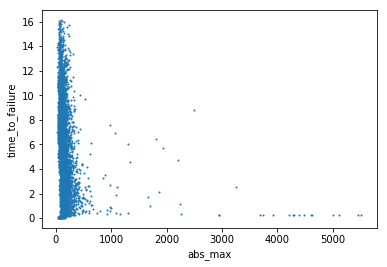

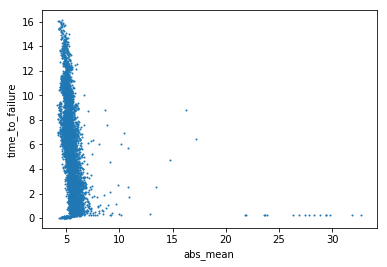

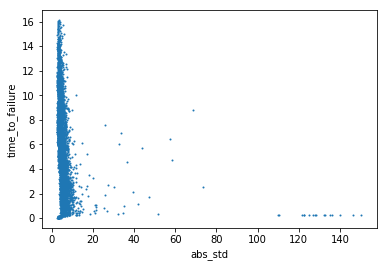

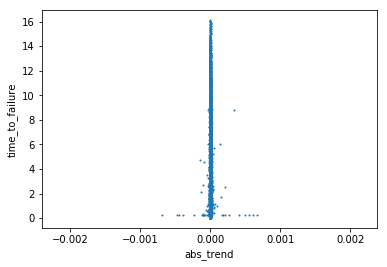

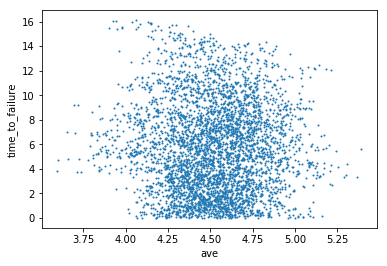

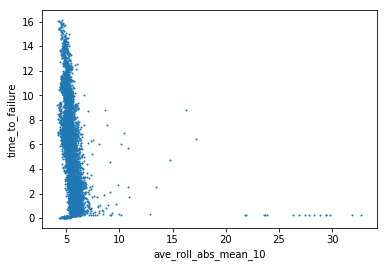

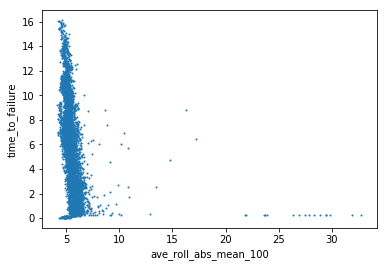

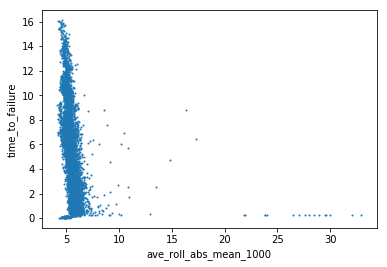

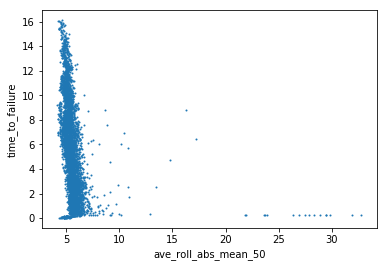

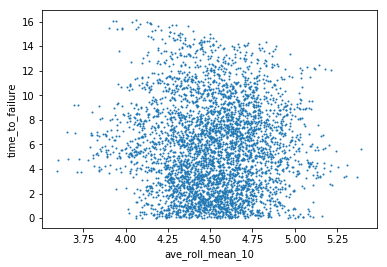

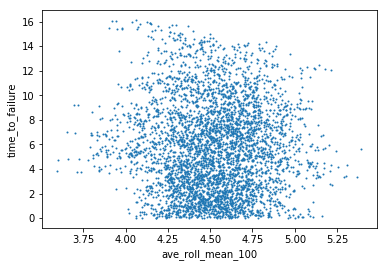

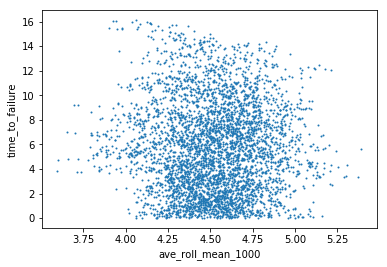

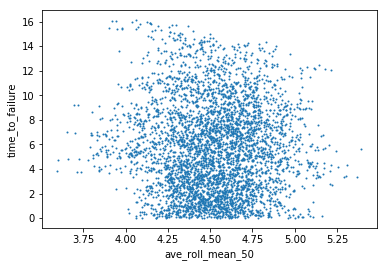

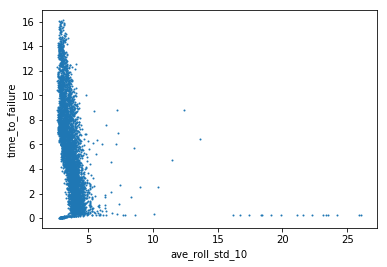

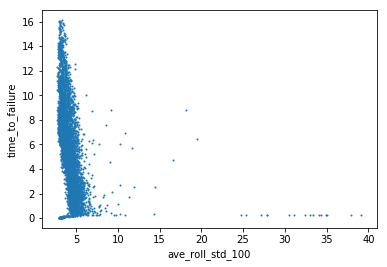

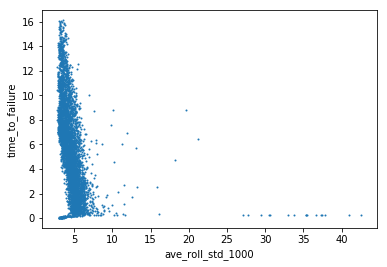

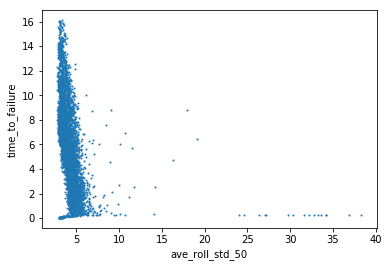

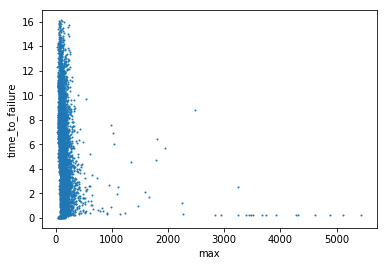

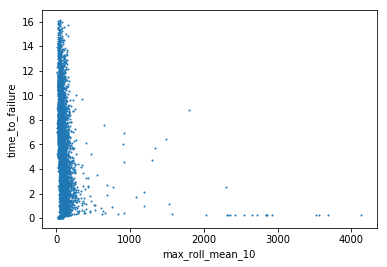

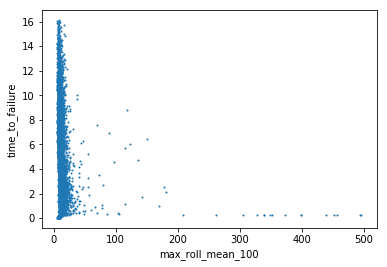

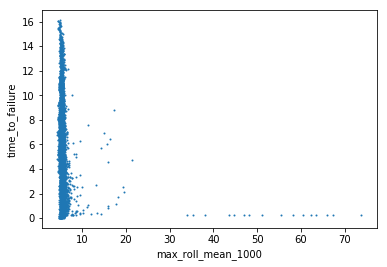

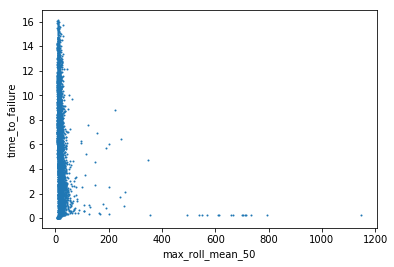

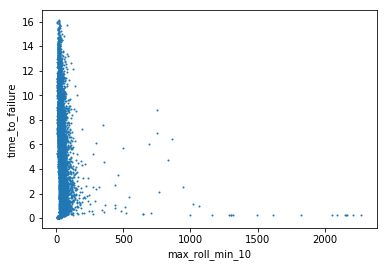

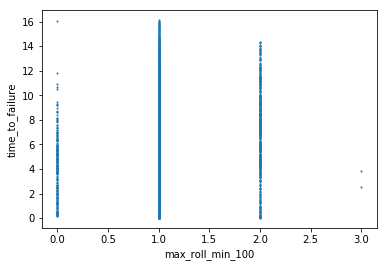

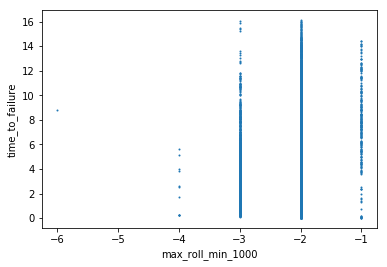

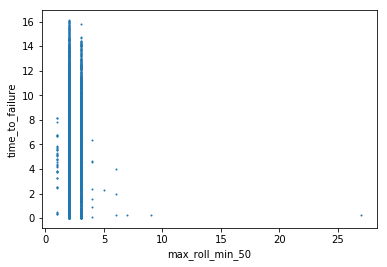

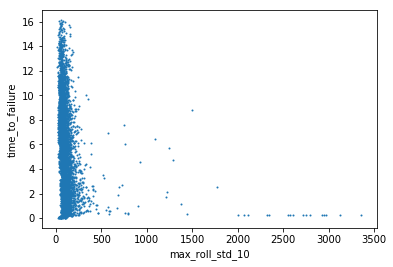

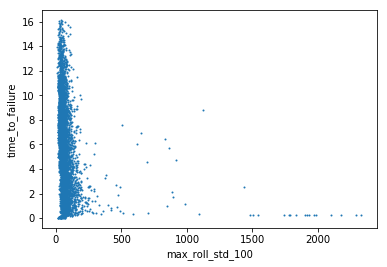

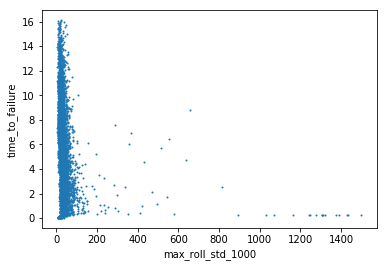

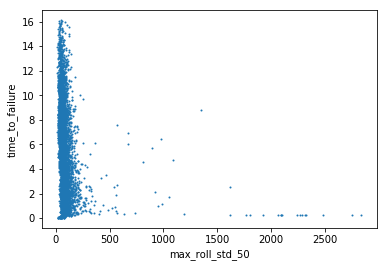

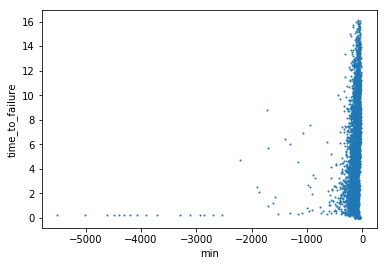

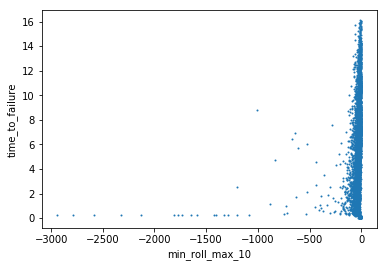

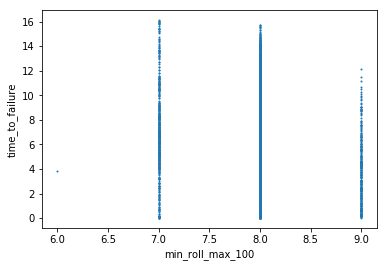

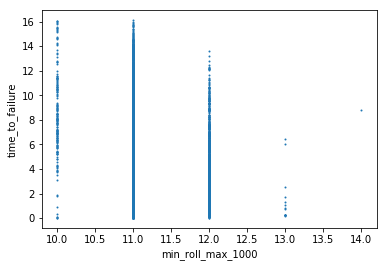

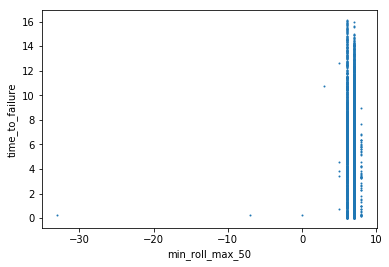

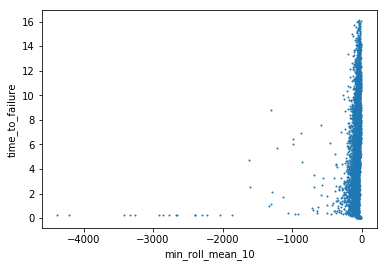

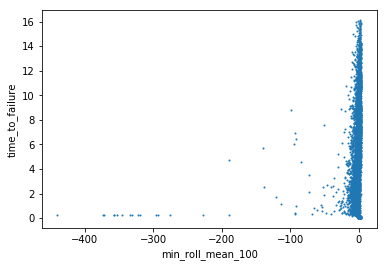

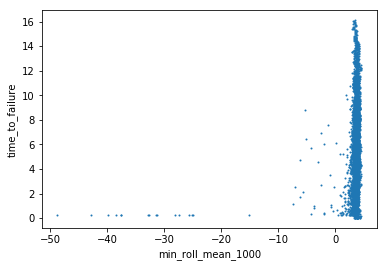

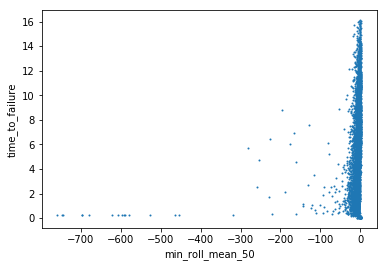

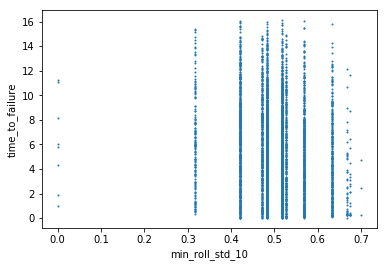

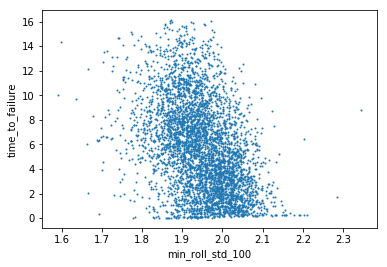

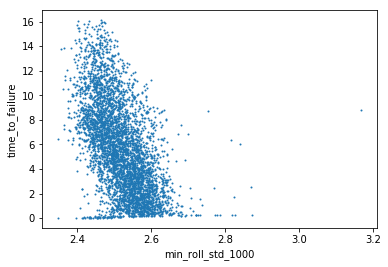

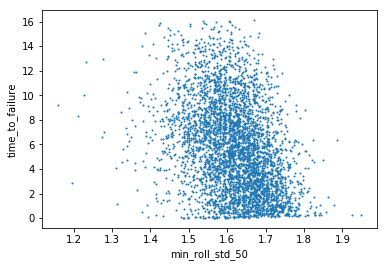

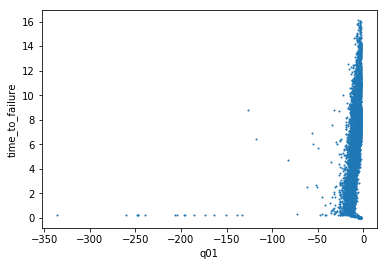

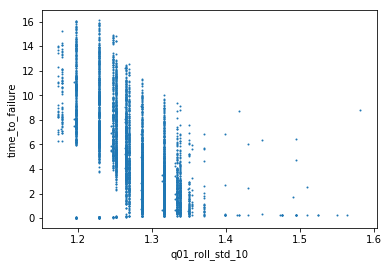

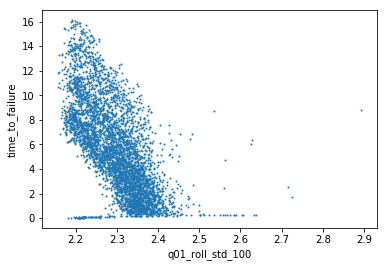

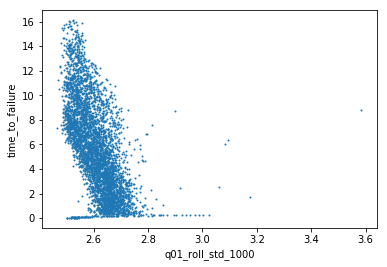

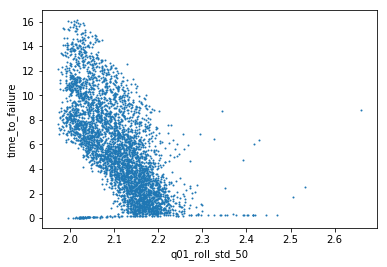

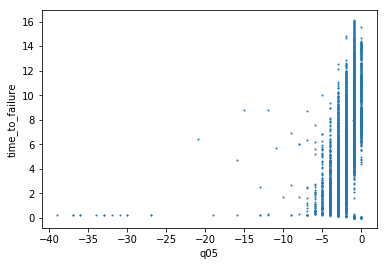

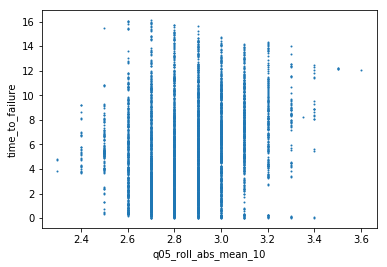

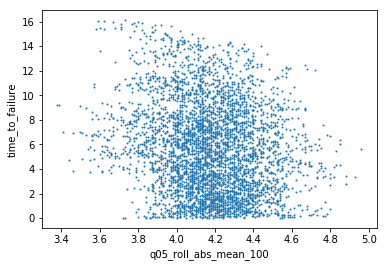

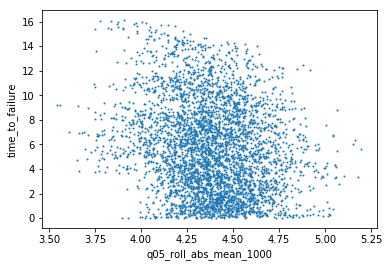

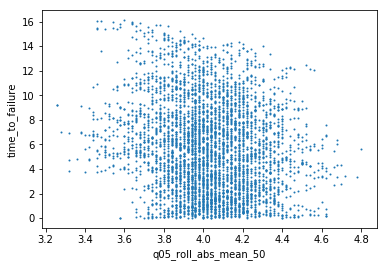

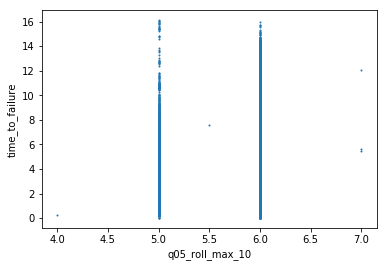

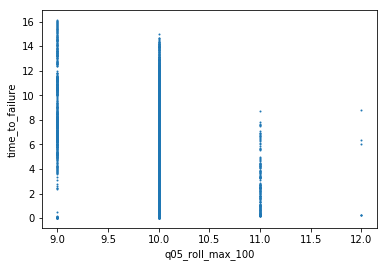

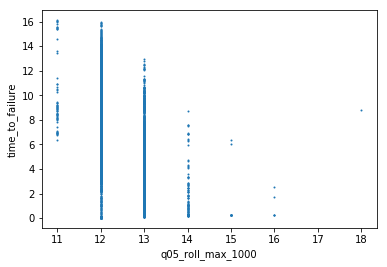

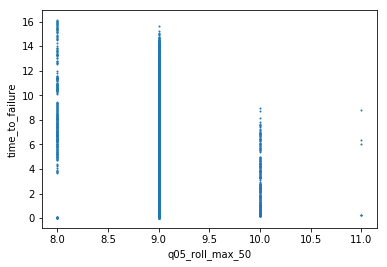

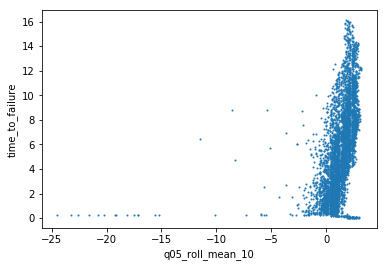

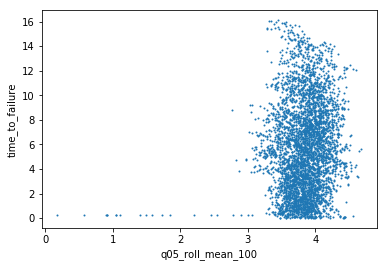

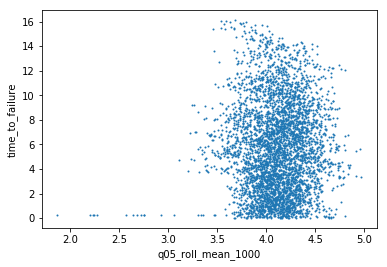

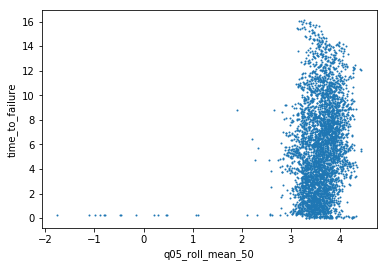

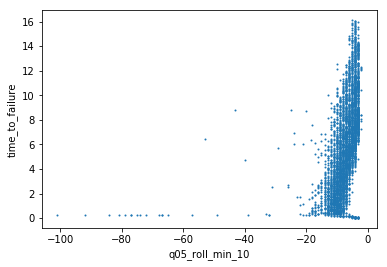

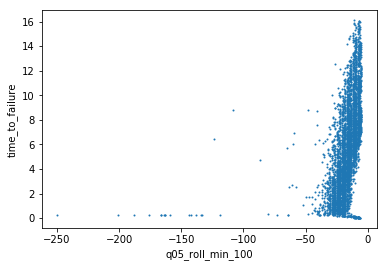

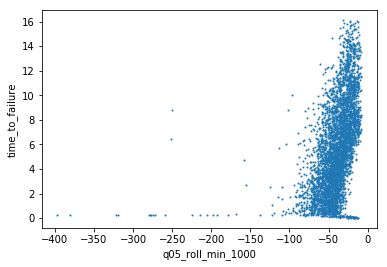

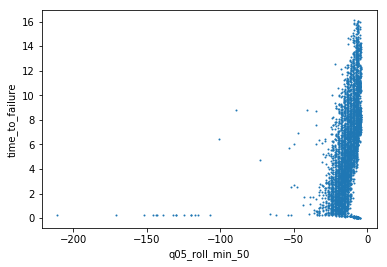

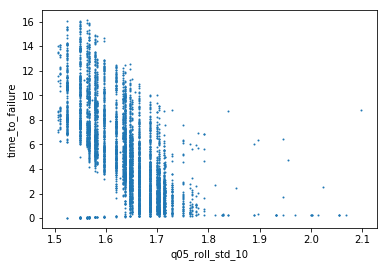

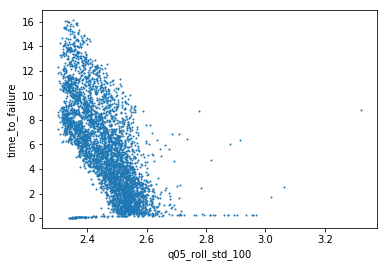

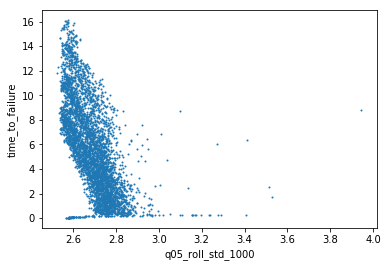

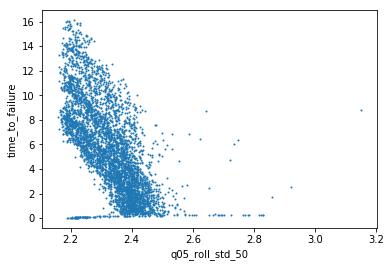

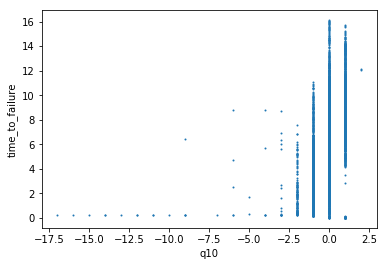

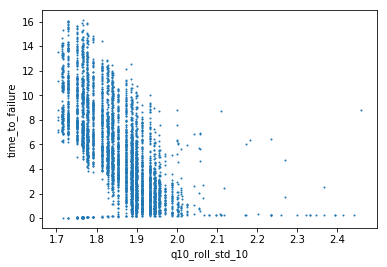

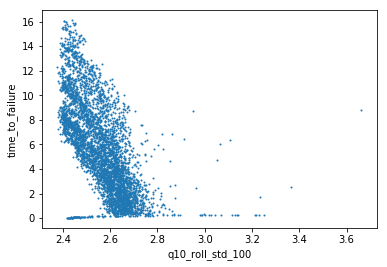

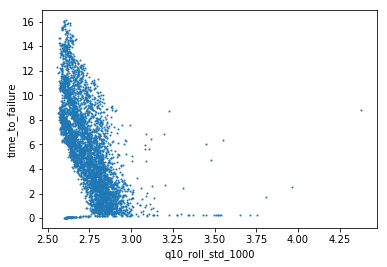

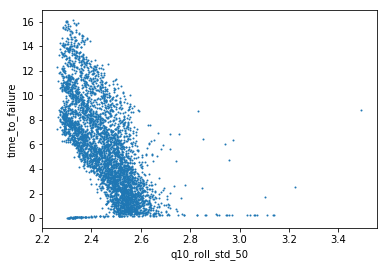

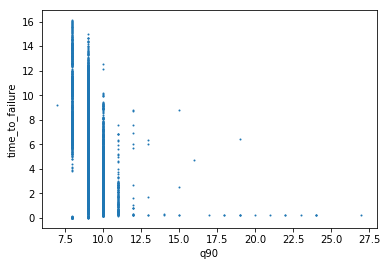

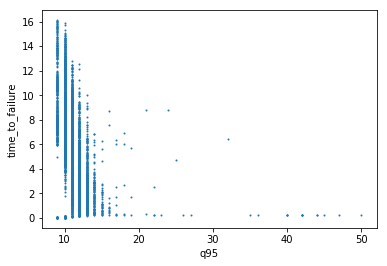

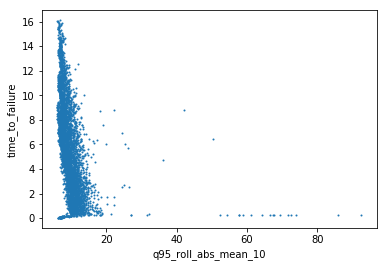

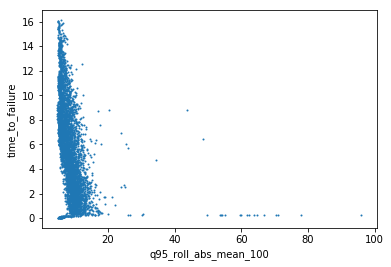

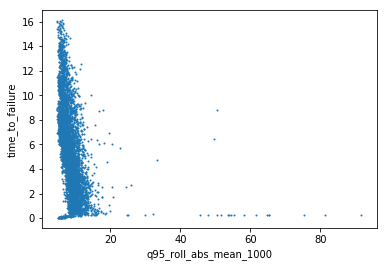

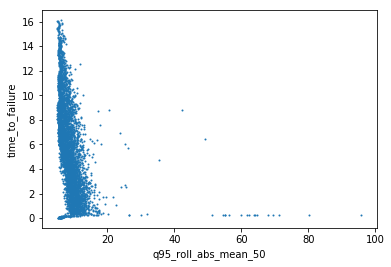

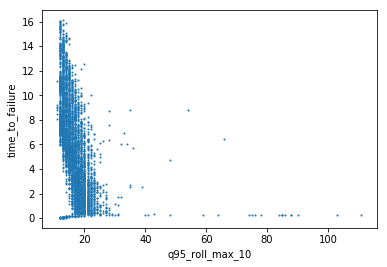

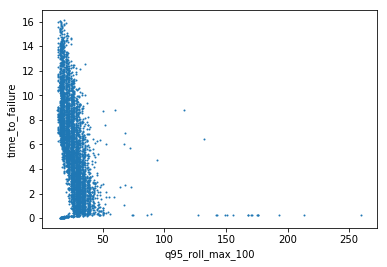

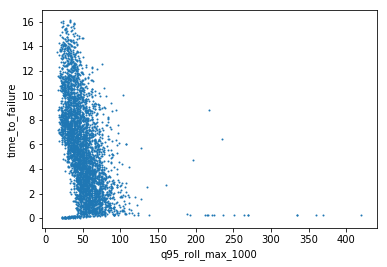

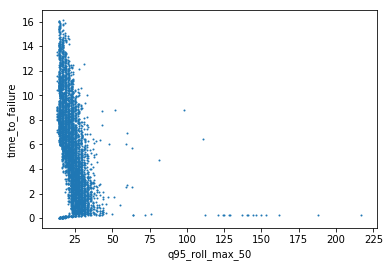

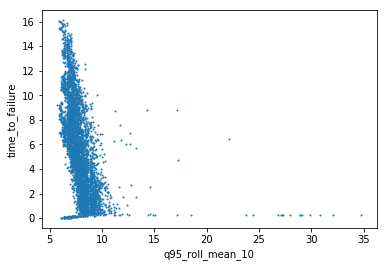

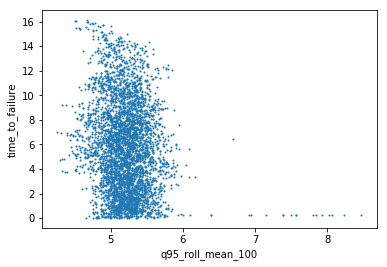

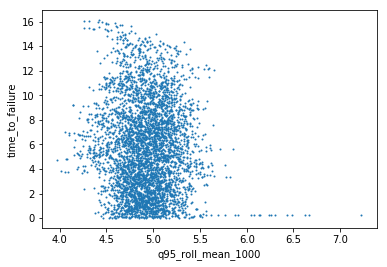

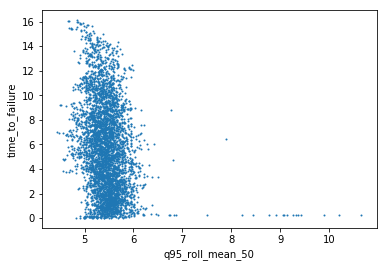

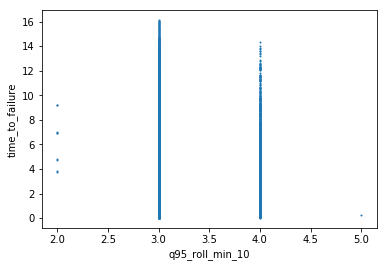

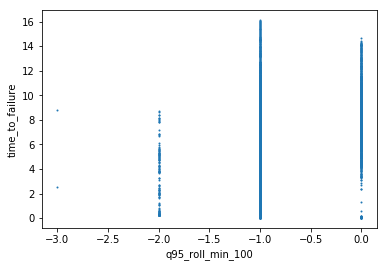

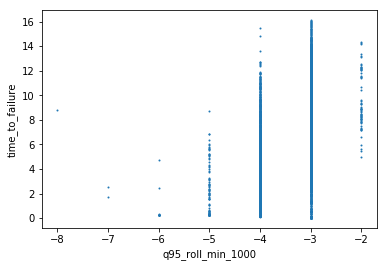

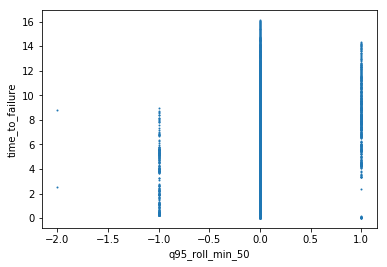

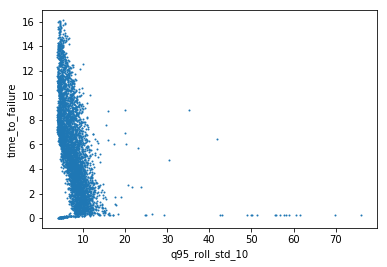

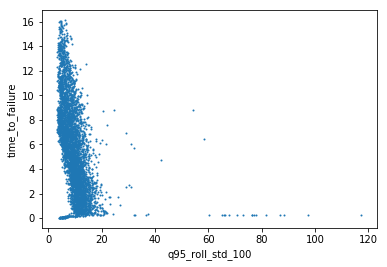

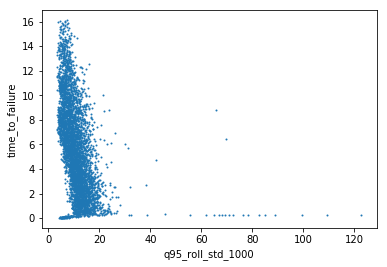

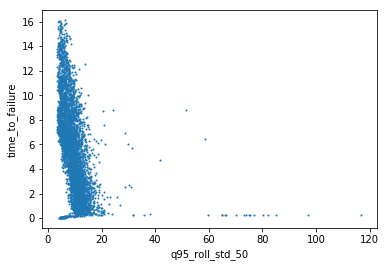

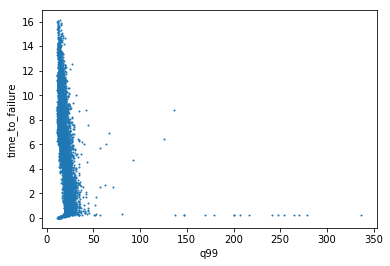

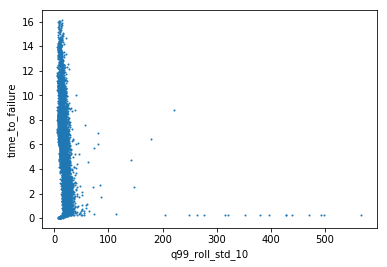

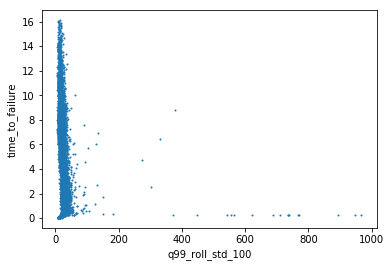

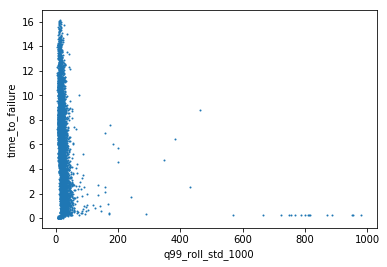

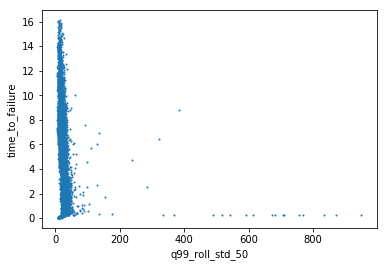

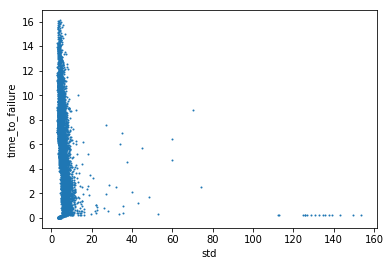

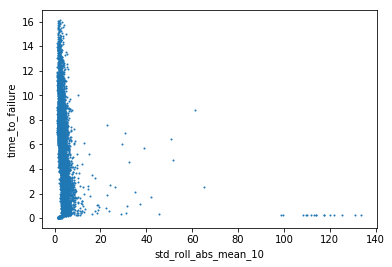

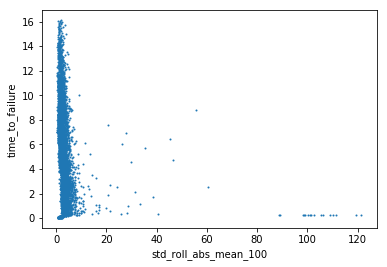

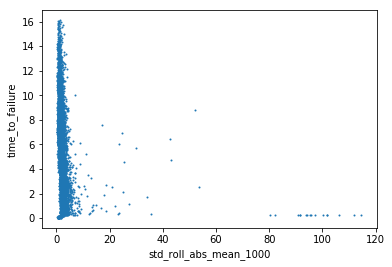

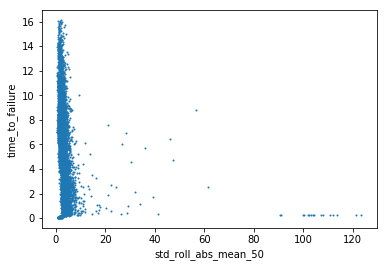

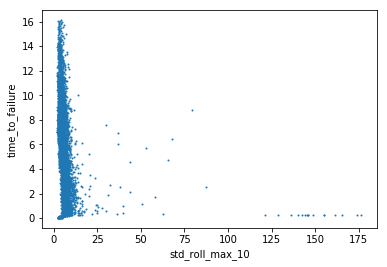

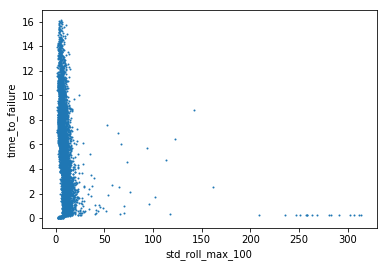

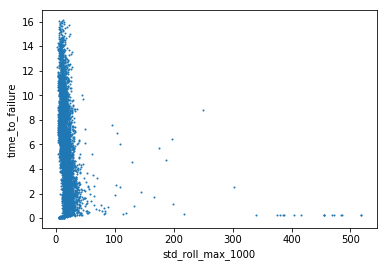

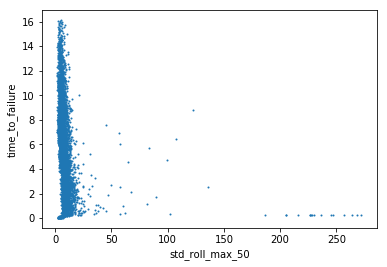

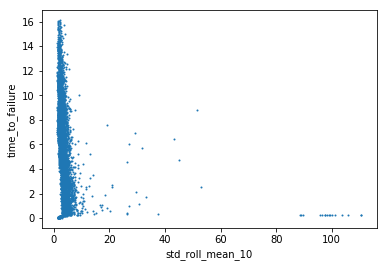

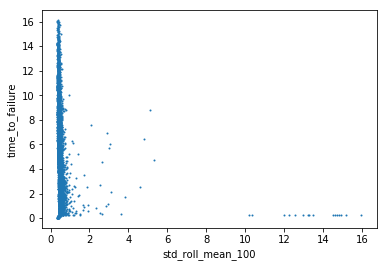

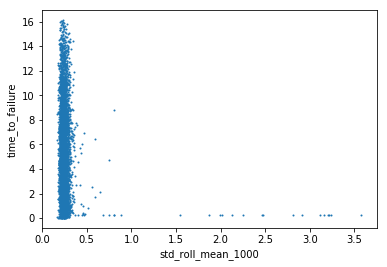

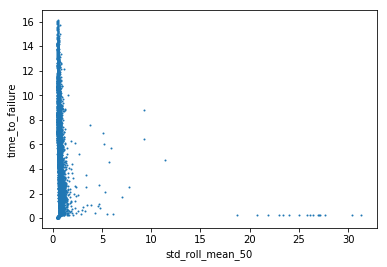

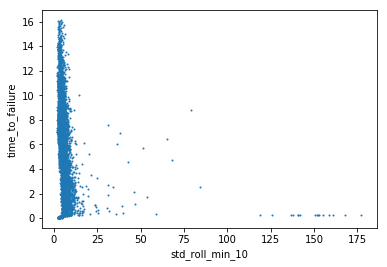

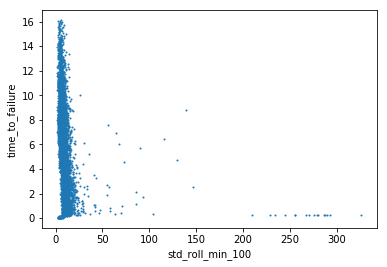

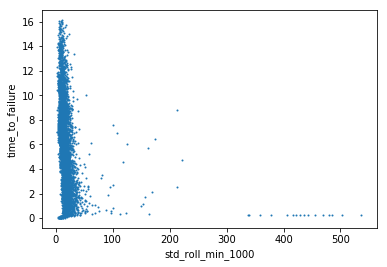

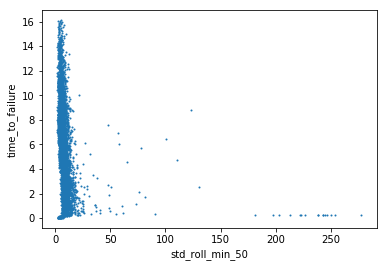

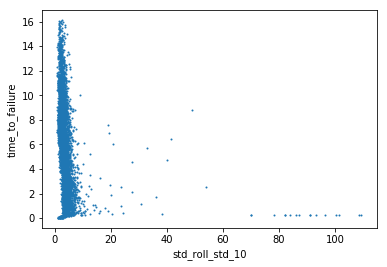

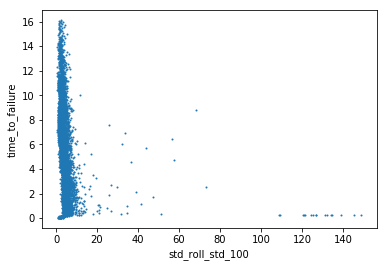

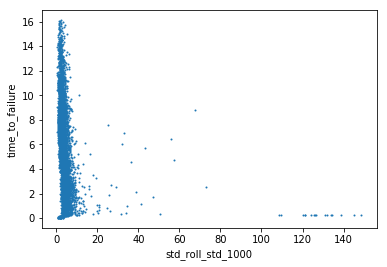

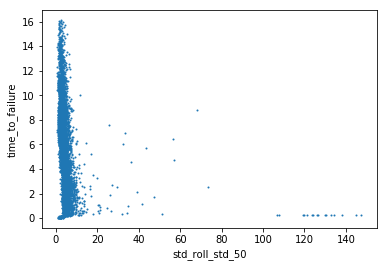

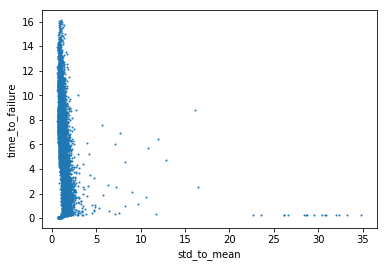

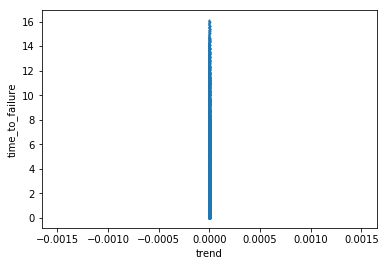

"\ndata = ['', 'q05_roll_std_10', 'q10_roll_std_100', 'q10_roll_std_50', 'q10_roll_std_1000', 'q05_roll_std_50']\nf, axarr = plt.subplots(1,2)\nfor i in range(1, 6):\n    plt.subplot(2, 3, i)\n    plt.scatter(X[data[i]], Y, s=0.1)\n    #plt.figure(figsize=(6,6))\n    plt.xlabel(data[i])\n    plt.ylabel('time_to_failure')\n"

In [0]:
keys = [k for k in X]
#[[plt.scatter(X[key], Y, s=1), plt.show()] for key in ['', 'q05_roll_std_10', 'q10_roll_std_100', 'q10_roll_std_50', 'q10_roll_std_1000', 'q05_roll_std_50']]
[[ plt.scatter(X[key], Y, s=1), plt.xlabel(key), plt.ylabel('time_to_failure'),plt.show()] for i, key in enumerate(keys)]
#plt.scatter(raw_sample['acoustic_data'], raw_sample['time_to_failure'], s=1)


# XGBOOST

In [0]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
param = {'max_depth' : 3, 'eta' : 0.1, 'seed' : 42}
num_round = 30
bst = xgb.train(param, dtrain, num_round, [(dtest, 'test'), (dtrain, 'train')])

[0]	test-rmse:5.80889	train-rmse:5.83416
[1]	test-rmse:5.35008	train-rmse:5.37063
[2]	test-rmse:4.94664	train-rmse:4.9625
[3]	test-rmse:4.59495	train-rmse:4.60514
[4]	test-rmse:4.28953	train-rmse:4.29337
[5]	test-rmse:4.02317	train-rmse:4.02234
[6]	test-rmse:3.79559	train-rmse:3.78767
[7]	test-rmse:3.59953	train-rmse:3.58606
[8]	test-rmse:3.43107	train-rmse:3.4135
[9]	test-rmse:3.28697	train-rmse:3.26576
[10]	test-rmse:3.1631	train-rmse:3.1398
[11]	test-rmse:3.06066	train-rmse:3.03126
[12]	test-rmse:2.97502	train-rmse:2.94033
[13]	test-rmse:2.9034	train-rmse:2.86382
[14]	test-rmse:2.84594	train-rmse:2.7988
[15]	test-rmse:2.79596	train-rmse:2.7445
[16]	test-rmse:2.75602	train-rmse:2.70004
[17]	test-rmse:2.7221	train-rmse:2.66183
[18]	test-rmse:2.69313	train-rmse:2.63013
[19]	test-rmse:2.66971	train-rmse:2.60282
[20]	test-rmse:2.65154	train-rmse:2.58018
[21]	test-rmse:2.63651	train-rmse:2.55945
[22]	test-rmse:2.62306	train-rmse:2.54277
[23]	test-rmse:2.61278	train-rmse:2.52859
[24]	test-

In [0]:
from sklearn.metrics import accuracy_score
test_mat = xgb.DMatrix(test_df.values)
preds = bst.predict(test_mat)
print len(preds)

2624


In [0]:
submission_xgboost = []                                                                                                                         #Array to save Segment and it's prediction
for i in range(len(preds)):
    submission_xgboost.append( {"seg_id":test_files[i], "time_to_failure":preds[i]})                                                          #Save every segment and it's prediction in submission array
pd.DataFrame(submission_xgboost).to_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission_xgboost.csv", index=False) #Save Predictions in a csv file

In [31]:
submission_xgb_df = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission_xgboost.csv")           #Read Saved Submission File
print submission_xgb_df.head(5)                                                                                                            #Print first 5 predictions of 2624 rows

       seg_id  time_to_failure
0  seg_63c8e4         9.306780
1  seg_5f352e         3.024169
2  seg_8fc754         8.172087
3  seg_f7290f         4.258749
4  seg_2383c2         6.530031


# LightGBM

In [35]:
import lightgbm
#categorical_features = [c for c, col in enumerate(X.columns) if 'cat' in col]
#print categorical_features
#
# Train the model
#
#split the training and target data into 3/4 for training and 1/4 for validation. Choose your split with test_size= values ranging from [0,1] percentage of data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




train_data = lightgbm.Dataset(X_train, y_train)
test_data = lightgbm.Dataset(X_test, y_test)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose':0
}

gbm = lightgbm.train(params, train_data, num_boost_round=100, valid_sets=test_data, early_stopping_rounds=10)

[1]	valid_0's l2: 12.6875
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l2: 12.0876
[3]	valid_0's l2: 11.5605
[4]	valid_0's l2: 11.0693
[5]	valid_0's l2: 10.6412
[6]	valid_0's l2: 10.2329
[7]	valid_0's l2: 9.88555
[8]	valid_0's l2: 9.55497
[9]	valid_0's l2: 9.25493
[10]	valid_0's l2: 8.98851
[11]	valid_0's l2: 8.73987
[12]	valid_0's l2: 8.53301
[13]	valid_0's l2: 8.33172
[14]	valid_0's l2: 8.15165
[15]	valid_0's l2: 7.99192
[16]	valid_0's l2: 7.86495
[17]	valid_0's l2: 7.73338
[18]	valid_0's l2: 7.61795
[19]	valid_0's l2: 7.50629
[20]	valid_0's l2: 7.42554
[21]	valid_0's l2: 7.33359
[22]	valid_0's l2: 7.25149
[23]	valid_0's l2: 7.18827
[24]	valid_0's l2: 7.13232
[25]	valid_0's l2: 7.07266
[26]	valid_0's l2: 7.02813
[27]	valid_0's l2: 6.97561
[28]	valid_0's l2: 6.92564
[29]	valid_0's l2: 6.89713
[30]	valid_0's l2: 6.87524
[31]	valid_0's l2: 6.83853
[32]	valid_0's l2: 6.8193
[33]	valid_0's l2: 6.79431
[34]	valid_0's l2: 6.77366
[35]	valid_0's l2: 6.75655
[36

In [36]:
test_df = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/test_set.csv")                    #Read Test Data
y_pred=gbm.predict(test_df)
print y_pred[:5]

[9.31914731 2.99457279 8.96910507 4.76309419 6.02609768]


In [0]:
test_files = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission.csv")['seg_id']                 #Get all Test Segments Names for printing name and it's prediction
submission_lightgbm = []                                                                                                                         #Array to save Segment and it's prediction
for i in range(len(y_pred)):
    submission_lightgbm.append( {"seg_id":test_files[i], "time_to_failure":y_pred[i]})                                                          #Save every segment and it's prediction in submission array
pd.DataFrame(submission_lightgbm).to_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission_lightgbm.csv", index=False) #Save Predictions in a csv file

In [38]:
submission_lightgbm_df = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission_lightgbm.csv")           #Read Saved Submission File
print submission_lightgbm_df.head(5)                                                                                                            #Print first 5 predictions of 2624 rows

       seg_id  time_to_failure
0  seg_63c8e4         9.319147
1  seg_5f352e         2.994573
2  seg_8fc754         8.969105
3  seg_f7290f         4.763094
4  seg_2383c2         6.026098


# Output

In [50]:
print "Neural Network-1"
submission_df = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission.csv")           #Read Saved Submission File
print submission_df.head(5)                                                                                                            #Print first 5 predictions of 2624 rows

Neural Network-1
       seg_id  time_to_failure
0  seg_63c8e4         9.026848
1  seg_5f352e         2.500248
2  seg_8fc754         5.918574
3  seg_f7290f         2.528211
4  seg_2383c2         4.211243


In [51]:
print "Neural Network-2"
submission_df = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission2.csv")           #Read Saved Submission File
print submission_df.head(5)                                                                                                            #Print first 5 predictions of 2624 rows

Neural Network-2
       seg_id  time_to_failure
0  seg_63c8e4         8.951637
1  seg_5f352e         2.662464
2  seg_8fc754         5.654181
3  seg_f7290f         2.476370
4  seg_2383c2         4.572516


In [52]:
print "XGBoost"
submission_xgb_df = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission_xgboost.csv")           #Read Saved Submission File
print submission_xgb_df.head(5)                                                                                                            #Print first 5 predictions of 2624 rows

XGBoost
       seg_id  time_to_failure
0  seg_63c8e4         9.306780
1  seg_5f352e         3.024169
2  seg_8fc754         8.172087
3  seg_f7290f         4.258749
4  seg_2383c2         6.530031


In [53]:
print "LightGBM"
submission_lightgbm_df = pd.read_csv("/content/gdrive/My Drive/Projects/Kaggle Challenges/LANL Earthquake Prediction/submission_lightgbm.csv")           #Read Saved Submission File
print submission_lightgbm_df.head(5)                                                                                                            #Print first 5 predictions of 2624 rows

LightGBM
       seg_id  time_to_failure
0  seg_63c8e4         9.319147
1  seg_5f352e         2.994573
2  seg_8fc754         8.969105
3  seg_f7290f         4.763094
4  seg_2383c2         6.026098
